In [23]:
import numpy as np
import math
from numpy.random import default_rng
rng = default_rng()

In [24]:
# Proposal distribution
def Q(previous_x):
    return previous_x + rng.standard_normal(1)[0]

def Q_density(new_x, given):
    return (1/math.sqrt(2 * math.pi) ) * math.e**(-0.5 *((new_x - given)/1)**2)

# Unnormalised probability distribution we want to sample from
def P(x):
    return math.e**(-0.5 *((x - 5)/5)**2)

## Initialisation Step

In [25]:

x_old = -10 # arbitrarily pick x_0 to be 0

## Iterative Steps

In [31]:
samples = []
while len(samples) < 400000:
    # Generate random candidate x':
    proposal = Q(x_old)
    # calculate acceptance probability
    P_ratio = P(proposal)/P(x_old)
    Q_ratio = Q_density(x_old, proposal)/Q_density(proposal, x_old)
    acceptance_prob = min(1, P_ratio * Q_ratio)
    # accept or reject
    u = rng.random()
    if (u <= acceptance_prob):
        x_old = proposal
        samples.append(proposal)
    else:
        x_old = x_old
        samples.append(x_old)
    
    
    


In [32]:
from matplotlib import pyplot as plt

(array([2.55313577e-06, 0.00000000e+00, 0.00000000e+00, 2.55313577e-06,
        0.00000000e+00, 5.10627155e-06, 1.53188146e-05, 7.65940732e-06,
        5.10627155e-05, 9.70191594e-05, 2.06803998e-04, 3.47226465e-04,
        7.55728189e-04, 1.40422468e-03, 2.27995025e-03, 3.71736569e-03,
        6.09944137e-03, 9.21937328e-03, 1.35852355e-02, 1.94548946e-02,
        2.62207044e-02, 3.43881857e-02, 4.36050059e-02, 5.25767250e-02,
        6.20284336e-02, 6.95295465e-02, 7.54375027e-02, 7.95557107e-02,
        7.94433728e-02, 7.69183215e-02, 7.14316327e-02, 6.42062585e-02,
        5.48234845e-02, 4.62296295e-02, 3.68825994e-02, 2.78598176e-02,
        2.09408196e-02, 1.45503208e-02, 1.02942434e-02, 6.63304674e-03,
        4.35054336e-03, 2.59143281e-03, 1.60336927e-03, 9.37000829e-04,
        4.64670711e-04, 2.88504343e-04, 9.70191594e-05, 7.40409375e-05,
        2.55313577e-05, 1.53188146e-05]),
 array([-22.55332733, -21.5741393 , -20.59495126, -19.61576323,
        -18.63657519, -17.6573

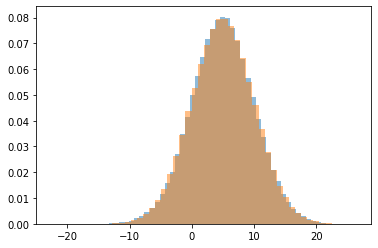

In [30]:
plt.hist(samples, bins=50, density=True, alpha=0.5)
plt.hist(rng.standard_normal(400000) * 5 + 5, bins=50, density=True, alpha=0.5)